<div style="widelta_th: 100%; overflow: hidden;">
    <div style="display: block;margin-left: auto;margin-right: auto; widelta_th: 100%;"><img src="./logo_dei.png"  /></div>
</div>

<h2 style="font-family:Avantgarde; font-size:2em; text-align: center;">Projeto 2 - Fusão de Informação e Análise de Dados</h2>


<h4 style="font-family:Avantgarde; font-size:1.75em; text-align: center;">Mestrado em Engenharia e Ciência de Dados</h4>
<h4 style="font-family:Avantgarde; font-size:1.3em; text-align: center;">Ano Letivo 2023/2024</h4>

<p style = "font-family:Avantgarde; font-size:1.1em; text-align: center;"> <b>Mariana Lopes Paulino - 2020190448</b></p>
<p style = "font-family:Avantgarde; font-size:1.1em; text-align: center;"> <b>Rui Alexandre Coelho Tapadinhas - 2018283200</b></p>

Screening

▪ x1 Gender {0,1} = { Female, Male} 

▪ X2 Age [34 .. 99]

▪ X3 Marital status {0,1} = { single, married} 

▪ X4 Vaccinated {0,1} = { No, Yes} 

▪ X5 Breathing difficulty {0,1,2,3} = { none, some, moderate, high}

Medidas

▪ X6 Heart Rate  [38.. 272]

▪ X7 Blood pressure  [115.. 164]

▪ X8 Temperature  [36.00  ..  38.98]

Conhecimento

▪ X9 Clinical Guidelines  A rule based on the breathing difficulty  and the temperature

Decisão

▪ T Decision Final decision {0,1} = { return home, stay at hospital }

<h3 style="font-family:Avantgarde; font-size:2em;">0. Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


<h3 style="font-family:Avantgarde; font-size:2em;">1. Load and Pre Proccess Data</h3>

In [2]:
data = pd.read_csv("Meta2COVID.txt", sep="   ", engine="python")
data.columns = ["Gender", "Age", "MaritalStatus", "Vaccinated", "BreathingDifficulty", "HeartRate", "BloodPressure", "Temperature", "Decision"]
data

,Gender,Age,MaritalStatus,Vaccinated,BreathingDifficulty,HeartRate,BloodPressure,Temperature,Decision
0,0.0,82.0,1.0,0.0,3.0,79.449753,132.81408,36.832310,1.0
1,1.0,65.0,0.0,0.0,3.0,85.470779,137.33184,37.580005,1.0
2,1.0,64.0,0.0,0.0,1.0,51.561135,149.29652,36.959370,0.0
3,0.0,85.0,1.0,0.0,2.0,89.008377,121.42689,37.744883,1.0
4,1.0,59.0,0.0,0.0,1.0,71.582639,164.88202,36.506535,0.0
...,...,...,...,...,...,...,...,...,...
594,1.0,60.0,1.0,0.0,1.0,72.236092,135.37860,36.099066,0.0
595,0.0,56.0,1.0,0.0,1.0,74.460422,144.13974,38.274403,1.0
596,0.0,55.0,0.0,1.0,3.0,43.010392,118.61472,38.173531,0.0
597,1.0,60.0,0.0,0.0,2.0,61.320137,135.02002,37.818543,1.0


In [3]:
data['Gender'] = data['Gender'].astype(int)
data['Age'] = data['Age'].astype(int)
data['MaritalStatus'] = data['MaritalStatus'].astype(int)
data['Vaccinated'] = data['Vaccinated'].astype(int)
data['BreathingDifficulty'] = data['BreathingDifficulty'].astype(int)
#data['HeartRate'] = data['HeartRate'].astype(int)
#data['BloodPressure'] = data['BloodPressure'].astype(int)
#data['Temperature'] = data['Temperature'].astype(int)
data['Decision'] = data['Decision'].astype(int)

data

,Gender,Age,MaritalStatus,Vaccinated,BreathingDifficulty,HeartRate,BloodPressure,Temperature,Decision
0,0,82,1,0,3,79.449753,132.81408,36.832310,1
1,1,65,0,0,3,85.470779,137.33184,37.580005,1
2,1,64,0,0,1,51.561135,149.29652,36.959370,0
3,0,85,1,0,2,89.008377,121.42689,37.744883,1
4,1,59,0,0,1,71.582639,164.88202,36.506535,0
...,...,...,...,...,...,...,...,...,...
594,1,60,1,0,1,72.236092,135.37860,36.099066,0
595,0,56,1,0,1,74.460422,144.13974,38.274403,1
596,0,55,0,1,3,43.010392,118.61472,38.173531,0
597,1,60,0,0,2,61.320137,135.02002,37.818543,1


In [4]:
data.describe()

,Gender,Age,MaritalStatus,Vaccinated,BreathingDifficulty,HeartRate,BloodPressure,Temperature,Decision
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,0.525876,64.667780,0.509182,0.489149,1.497496,67.777811,140.799646,37.475296,0.322204
std,0.499747,12.191949,0.500333,0.500300,1.124184,24.128167,14.514810,0.848428,0.467711
min,0.000000,26.000000,0.000000,0.000000,0.000000,38.000000,115.096690,35.839809,0.000000
25%,0.000000,56.000000,0.000000,0.000000,0.000000,53.457034,128.097870,36.777783,0.000000
50%,1.000000,64.000000,1.000000,0.000000,1.000000,66.082875,140.709020,37.473156,0.000000
75%,1.000000,72.000000,1.000000,1.000000,3.000000,78.608148,153.610790,38.172055,1.000000
max,1.000000,107.000000,1.000000,1.000000,3.000000,272.178480,164.945760,39.126040,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               599 non-null    int64  
 1   Age                  599 non-null    int64  
 2   MaritalStatus        599 non-null    int64  
 3   Vaccinated           599 non-null    int64  
 4   BreathingDifficulty  599 non-null    int64  
 5   HeartRate            599 non-null    float64
 6   BloodPressure        599 non-null    float64
 7   Temperature          599 non-null    float64
 8   Decision             599 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 42.2 KB


In [6]:
data.insert(8, 'ClinicalGuidelines', '0')
data['ClinicalGuidelines'] = np.where((data['BreathingDifficulty'] >= 2) & (data['Temperature'] > 37.8), '1', '0')

data

,Gender,Age,MaritalStatus,Vaccinated,BreathingDifficulty,HeartRate,BloodPressure,Temperature,ClinicalGuidelines,Decision
0,0,82,1,0,3,79.449753,132.81408,36.832310,0,1
1,1,65,0,0,3,85.470779,137.33184,37.580005,0,1
2,1,64,0,0,1,51.561135,149.29652,36.959370,0,0
3,0,85,1,0,2,89.008377,121.42689,37.744883,0,1
4,1,59,0,0,1,71.582639,164.88202,36.506535,0,0
...,...,...,...,...,...,...,...,...,...,...
594,1,60,1,0,1,72.236092,135.37860,36.099066,0,0
595,0,56,1,0,1,74.460422,144.13974,38.274403,0,1
596,0,55,0,1,3,43.010392,118.61472,38.173531,1,0
597,1,60,0,0,2,61.320137,135.02002,37.818543,1,1


In [7]:
# Stay at Hospital
hospital = data[data['Decision'] == 1]
hospital.describe()
#hospital

print("Hospitalized: ", len(hospital))
print("Probability of Hospitalization: ", len(hospital)/len(data))

Hospitalized:  193
Probability of Hospitalization:  0.32220367278797996


In [8]:
# Go Home
home = data[data['Decision'] == 0]
home.describe()
#home

print("Home: ", len(home))
print("Probability of Going Home: ", len(home)/len(data))

Home:  406
Probability of Going Home:  0.67779632721202


<h3 style="font-family:Avantgarde; font-size:2em;">2. Explore Data Visually</h3>

/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/2953202074.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age, hist=True, kde=True, color = 'pink',
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/2953202074.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

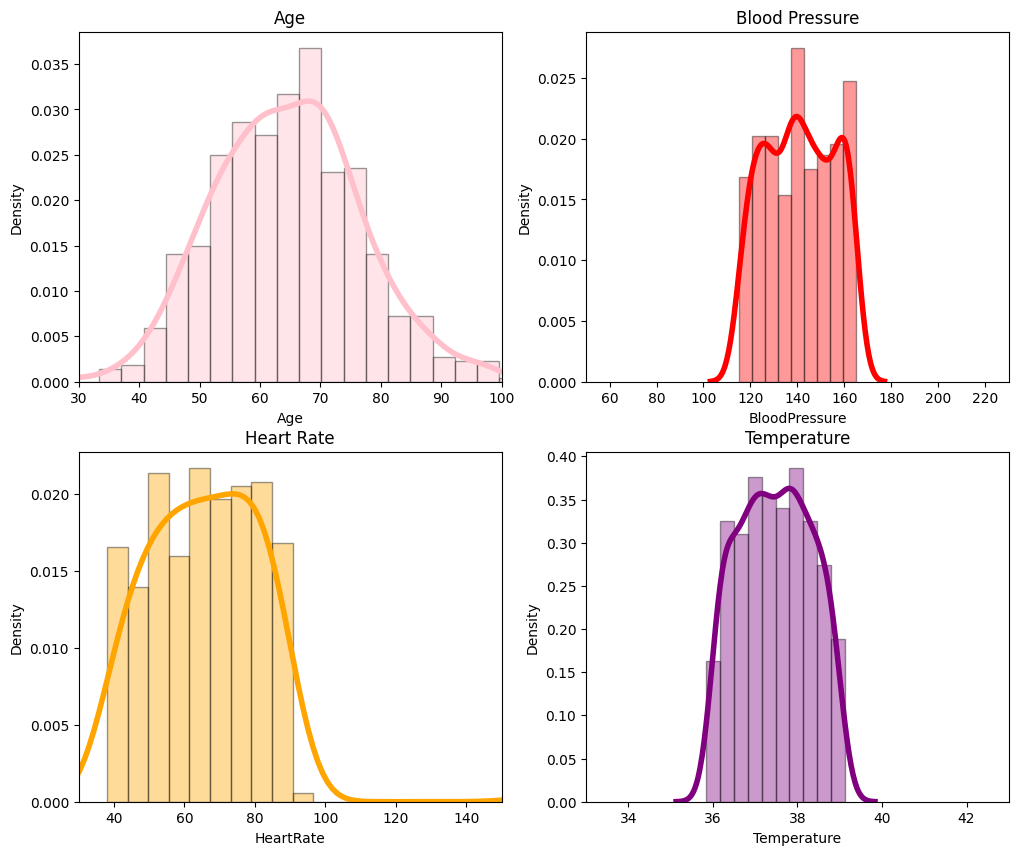

In [9]:
fig,axs = plt.subplots(2,2)
fig.set_size_inches(12, 10)

axs[0,0].set_title('Age')
axs[0,0].set_xlim(30,100)
sns.distplot(data.Age, hist=True, kde=True, color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4,},ax =axs[0,0])

axs[0,1].set_title('Blood Pressure')
axs[0,1].set_xlim(50,230)
sns.distplot(data.BloodPressure, hist=True, kde=True, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax =axs[0,1])

axs[1,0].set_title('Heart Rate')
axs[1,0].set_xlim(30,150)

sns.distplot(data.HeartRate, hist=True, kde=True, color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax =axs[1,0])
            
axs[1,1].set_title('Temperature')
axs[1,1].set_xlim(33,43)
sns.distplot(data.Temperature, hist=True, kde=True, color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax =axs[1,1])
plt.show()

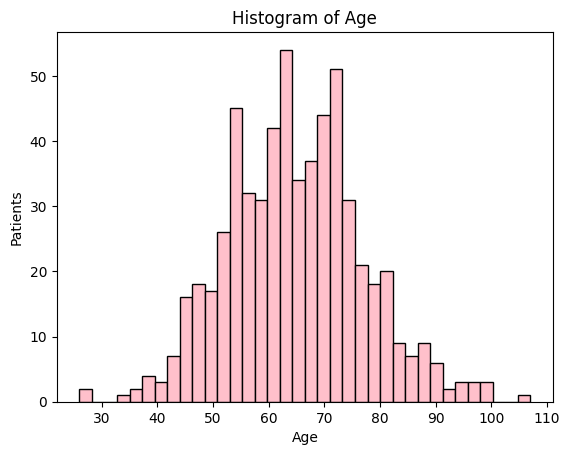

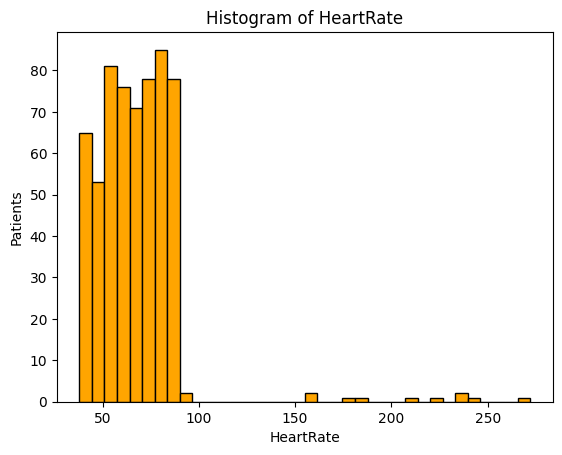

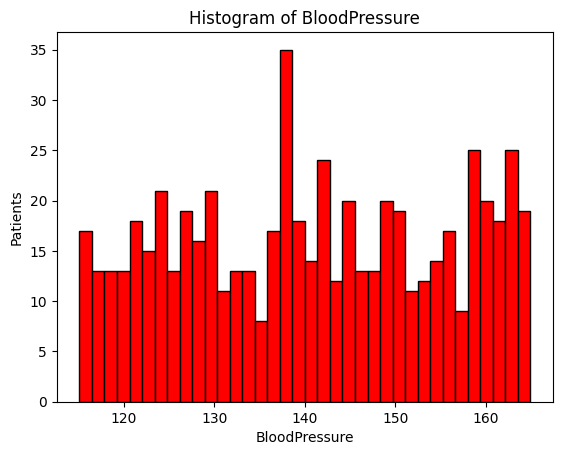

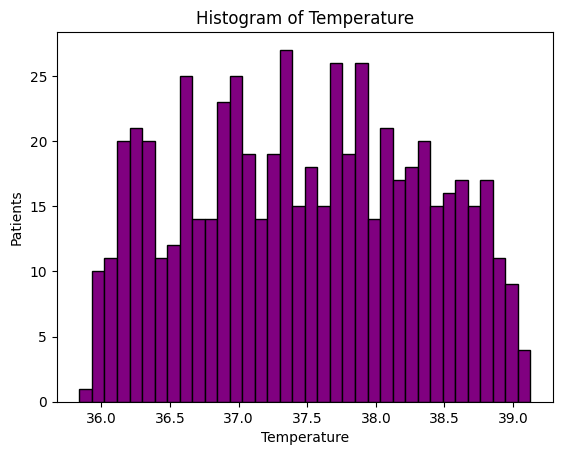

In [10]:
#Distribuitions of the features
#Matplotlib histogram
plt.hist(data['Age'], color = 'pink', edgecolor = 'black', bins = int(180/5))
# Add labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Patients')
plt.show()

plt.hist(data['HeartRate'], color = 'orange', edgecolor = 'black', bins = int(180/5))
# Add labels
plt.title('Histogram of HeartRate')
plt.xlabel('HeartRate')
plt.ylabel('Patients')
plt.show()

plt.hist(data['BloodPressure'], color = 'red', edgecolor = 'black', bins = int(180/5))
# Add labels
plt.title('Histogram of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Patients')
plt.show()

plt.hist(data['Temperature'], color = 'purple', edgecolor = 'black', bins = int(180/5))
# Add labels
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Patients')
plt.show()

/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/3298322261.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Age'], color = 'pink', shade = True)


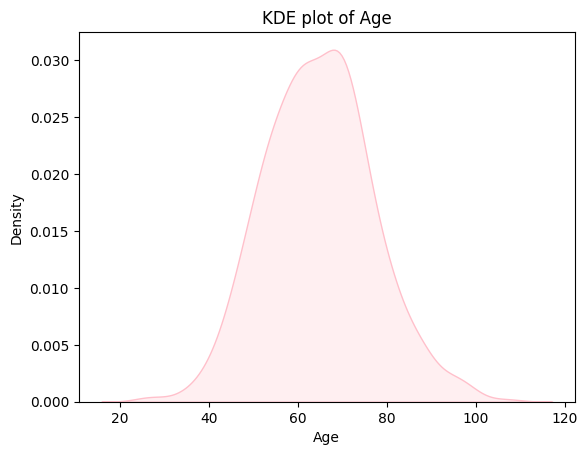

/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/3298322261.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['HeartRate'], color = 'orange', shade = True)


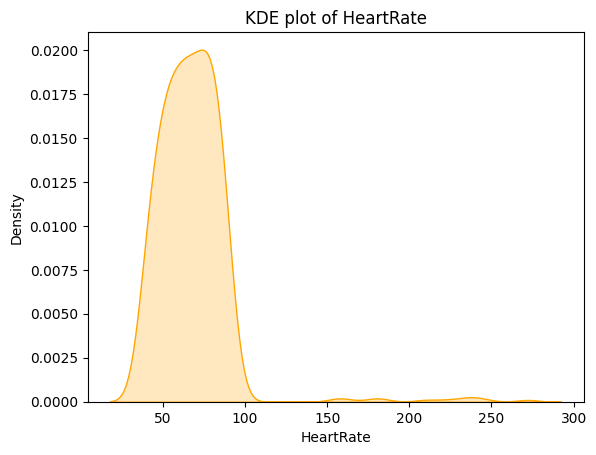

/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/3298322261.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['BloodPressure'], color = 'red', shade = True)


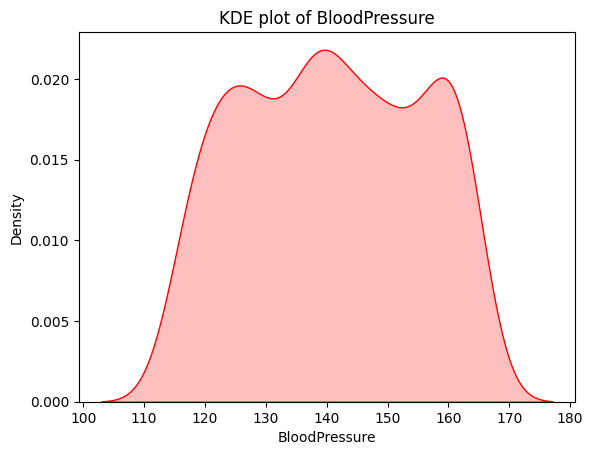

/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/3298322261.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Temperature'], color = 'purple', shade = True)


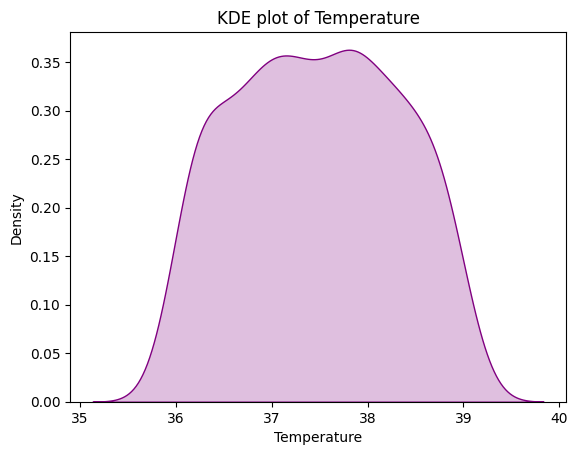

In [11]:
#KDE plot
sns.kdeplot(data['Age'], color = 'pink', shade = True)
plt.title('KDE plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

sns.kdeplot(data['HeartRate'], color = 'orange', shade = True)
plt.title('KDE plot of HeartRate')
plt.xlabel('HeartRate')
plt.ylabel('Density')
plt.show()

sns.kdeplot(data['BloodPressure'], color = 'red', shade = True)
plt.title('KDE plot of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Density')
plt.show()

sns.kdeplot(data['Temperature'], color = 'purple', shade = True)
plt.title('KDE plot of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.show()


/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/3245350609.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Decision'] == 0]['Age'], color='pink', shade=True, ax=ax[0])
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/3245350609.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Decision'] == 1]['Age'], color='magenta', shade=True, ax=ax[1])


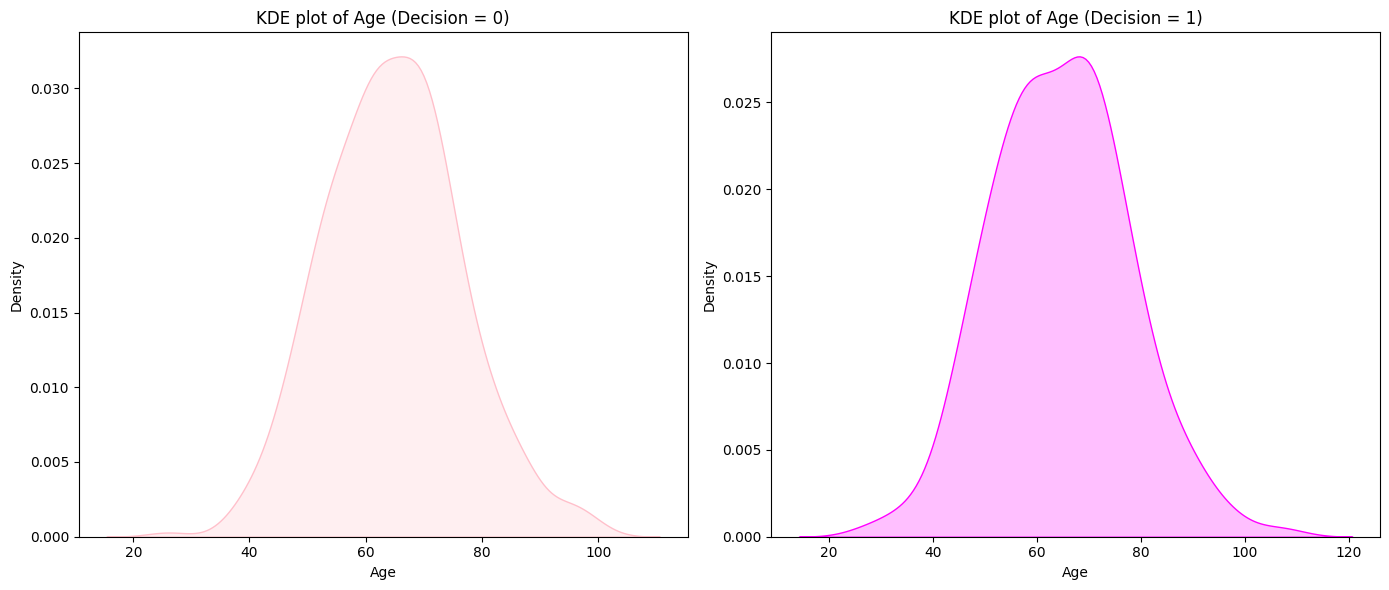

/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/3245350609.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Decision'] == 0]['HeartRate'], color='orange', shade=True, ax=ax[0])
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/3245350609.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Decision'] == 1]['HeartRate'], color='yellow', shade=True, ax=ax[1])


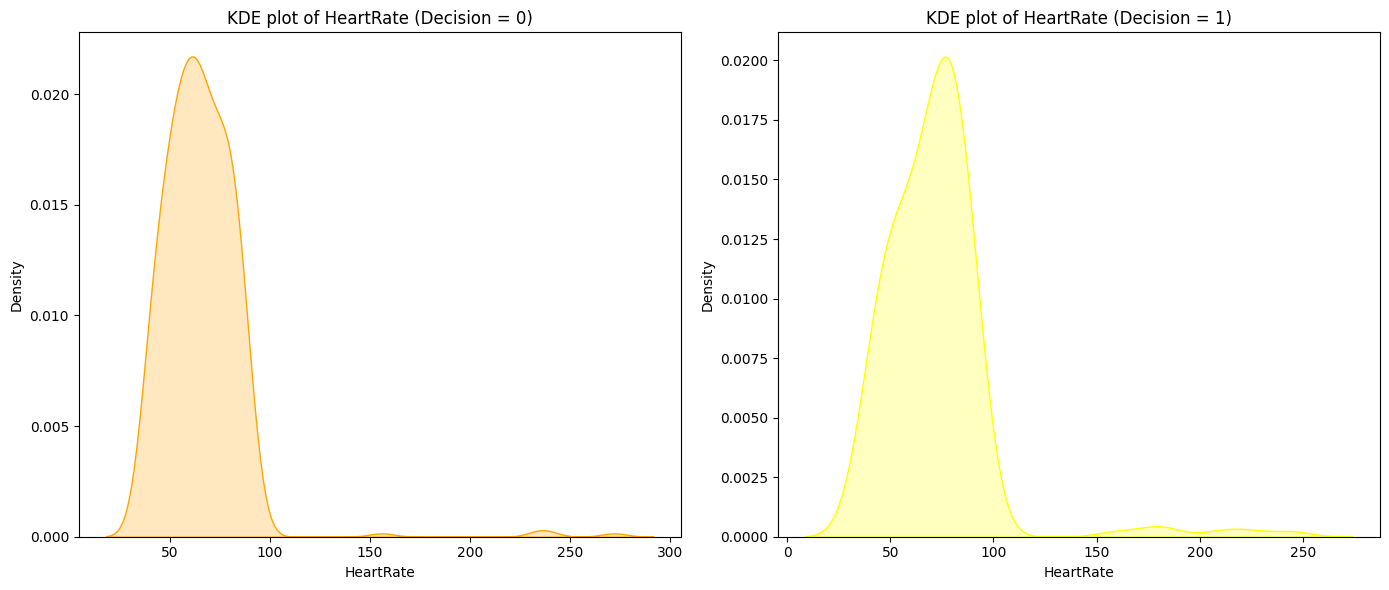

/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/3245350609.py:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Decision'] == 0]['BloodPressure'], color='red', shade=True, ax=ax[0])
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/3245350609.py:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Decision'] == 1]['BloodPressure'], color='brown', shade=True, ax=ax[1])


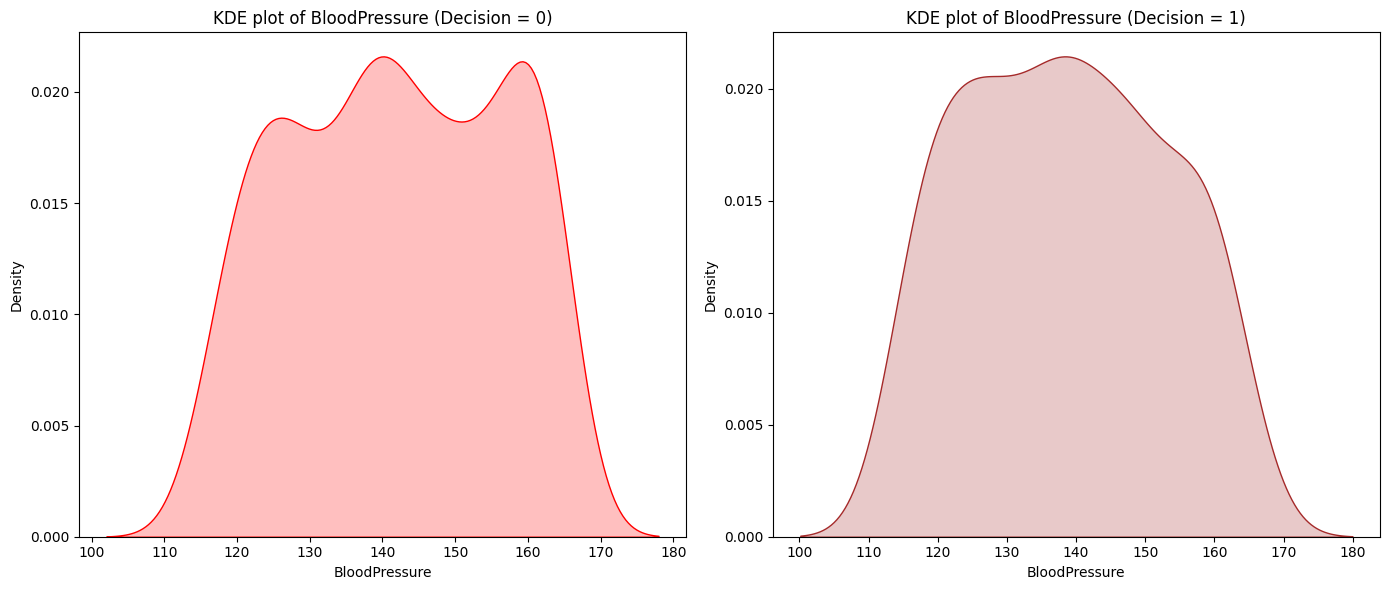

/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/3245350609.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Decision'] == 0]['Temperature'], color='purple', shade=True, ax=ax[0])
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/3245350609.py:58: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Decision'] == 1]['Temperature'], color='black', shade=True, ax=ax[1])


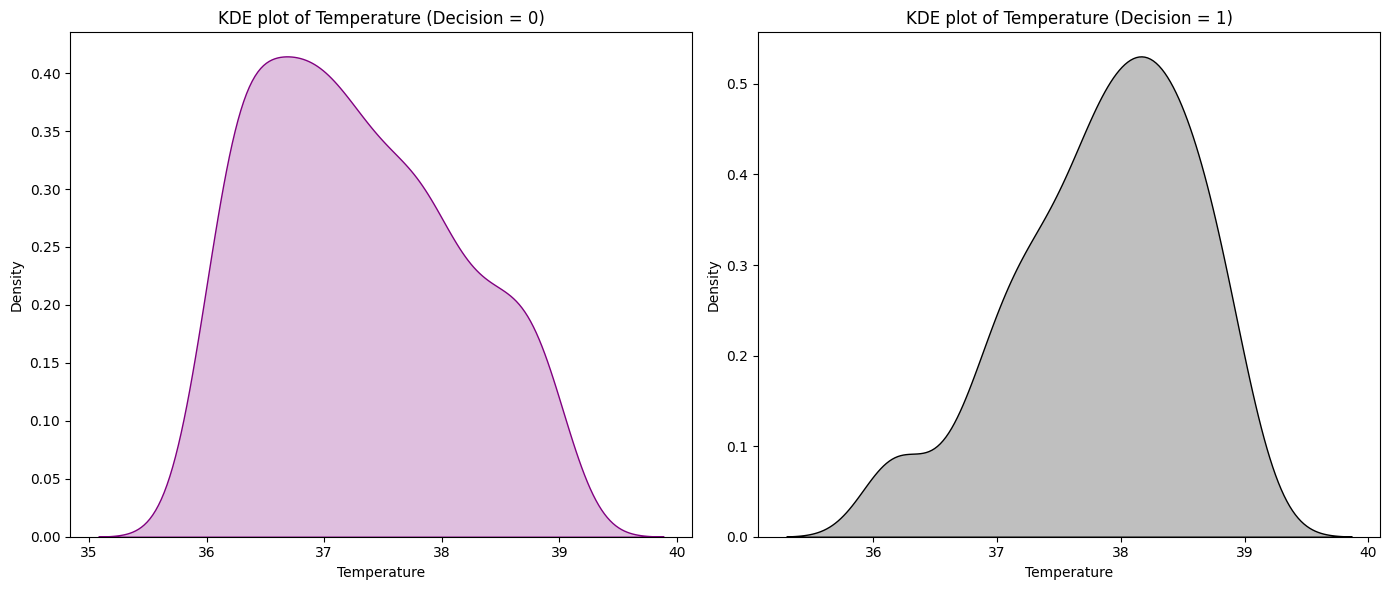

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is your DataFrame and it has the columns 'Age', 'HeartRate', 'BloodPressure', 'Temperature', and 'Decision'

# Create subplots for Age
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.kdeplot(data[data['Decision'] == 0]['Age'], color='pink', shade=True, ax=ax[0])
ax[0].set_title('KDE plot of Age (Decision = 0)')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Density')

sns.kdeplot(data[data['Decision'] == 1]['Age'], color='magenta', shade=True, ax=ax[1])
ax[1].set_title('KDE plot of Age (Decision = 1)')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# Create subplots for HeartRate
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.kdeplot(data[data['Decision'] == 0]['HeartRate'], color='orange', shade=True, ax=ax[0])
ax[0].set_title('KDE plot of HeartRate (Decision = 0)')
ax[0].set_xlabel('HeartRate')
ax[0].set_ylabel('Density')

sns.kdeplot(data[data['Decision'] == 1]['HeartRate'], color='yellow', shade=True, ax=ax[1])
ax[1].set_title('KDE plot of HeartRate (Decision = 1)')
ax[1].set_xlabel('HeartRate')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# Create subplots for BloodPressure
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.kdeplot(data[data['Decision'] == 0]['BloodPressure'], color='red', shade=True, ax=ax[0])
ax[0].set_title('KDE plot of BloodPressure (Decision = 0)')
ax[0].set_xlabel('BloodPressure')
ax[0].set_ylabel('Density')

sns.kdeplot(data[data['Decision'] == 1]['BloodPressure'], color='brown', shade=True, ax=ax[1])
ax[1].set_title('KDE plot of BloodPressure (Decision = 1)')
ax[1].set_xlabel('BloodPressure')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# Create subplots for Temperature
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.kdeplot(data[data['Decision'] == 0]['Temperature'], color='purple', shade=True, ax=ax[0])
ax[0].set_title('KDE plot of Temperature (Decision = 0)')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('Density')

sns.kdeplot(data[data['Decision'] == 1]['Temperature'], color='black', shade=True, ax=ax[1])
ax[1].set_title('KDE plot of Temperature (Decision = 1)')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


<h3 style="font-family:Avantgarde; font-size:2em;">3. Calculate Priors and Likelihoods</h3>

In [13]:
# Calculate Priors - Probability of Each Class
total_patients = len(data)
priors = data['Decision'].value_counts(normalize=True).to_dict()
print(priors)


{0: 0.67779632721202, 1: 0.32220367278797996}


In [14]:
discrete_features = ['Gender','MaritalStatus','Vaccinated','BreathingDifficulty','ClinicalGuidelines']
continuous_features = ['Age','HeartRate','BloodPressure','Temperature']

### Likelihood for Discrete

In [15]:
# Calculate Likelihoods for discrete features
likelihoods = {}
for feature in discrete_features:
    feature_likelihoods = data.groupby([feature,'Decision']).size().unstack().fillna(0)
    feature_likelihoods = feature_likelihoods.apply(lambda x: x/x.sum(), axis=1)
    likelihoods[feature] = feature_likelihoods.to_dict()
    print(feature)
    print(feature_likelihoods)
    print('\n')

Gender
Decision         0         1
Gender                      
0         0.809859  0.190141
1         0.558730  0.441270


MaritalStatus
Decision              0         1
MaritalStatus                    
0              0.710884  0.289116
1              0.645902  0.354098


Vaccinated
Decision           0         1
Vaccinated                    
0           0.496732  0.503268
1           0.866894  0.133106


BreathingDifficulty
Decision                    0         1
BreathingDifficulty                    
0                    0.807947  0.192053
1                    0.741722  0.258278
2                    0.627586  0.372414
3                    0.532895  0.467105


ClinicalGuidelines
Decision                   0         1
ClinicalGuidelines                    
0                   0.741201  0.258799
1                   0.413793  0.586207




### Likelihood for Continuous

In [16]:
# Calculate Likelihoods for continuous features
for feature in continuous_features:
    feature_likelihoods = data.groupby('Decision')[feature].agg([np.mean, np.std])
    likelihoods[feature] = feature_likelihoods.to_dict()
    print(feature)
    print(feature_likelihoods)
    print('\n')

Age
               mean        std
Decision                      
0         64.709360  11.766840
1         64.580311  13.072515


HeartRate
               mean        std
Decision                      
0         65.703689  21.762866
1         72.140989  28.034471


BloodPressure
                mean        std
Decision                       
0         141.906836  14.484498
1         138.470530  14.338269


Temperature
               mean       std
Decision                     
0         37.290987  0.843831
1         37.863012  0.719061




/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/257438214.py:3: FutureWarning: The provided callable <function mean at 0x113510cc0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  feature_likelihoods = data.groupby('Decision')[feature].agg([np.mean, np.std])
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/257438214.py:3: FutureWarning: The provided callable <function std at 0x113510e00> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  feature_likelihoods = data.groupby('Decision')[feature].agg([np.mean, np.std])
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/257438214.py:3: FutureWarning: The provided callable <function mean at 0x113510cc0> is currently using SeriesGroupBy.mean. In a future ve

## Evidences

In [17]:
#Evidences
# Continuous
cont_evidences = data[continuous_features].agg([np.mean, np.std]).to_dict()
print(cont_evidences)

# Discrete
disc_evidences = data[discrete_features].agg([pd.Series.mode]).to_dict()
print(disc_evidences)

{'Age': {'mean': 64.6677796327212, 'std': 12.191949215106321}, 'HeartRate': {'mean': 67.77781078464108, 'std': 24.12816657472998}, 'BloodPressure': {'mean': 140.79964570951586, 'std': 14.514810210709872}, 'Temperature': {'mean': 37.47529580467445, 'std': 0.848427759027945}}
{('Gender', 'mode'): {0: 1}, ('MaritalStatus', 'mode'): {0: 1}, ('Vaccinated', 'mode'): {0: 0}, ('BreathingDifficulty', 'mode'): {0: 3}, ('ClinicalGuidelines', 'mode'): {0: '0'}}


/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/1426698624.py:3: FutureWarning: The provided callable <function mean at 0x113510cc0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  cont_evidences = data[continuous_features].agg([np.mean, np.std]).to_dict()
/var/folders/s8/ryzdv1sn1g15nt9h4886lz7m0000gn/T/ipykernel_6929/1426698624.py:3: FutureWarning: The provided callable <function std at 0x113510e00> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  cont_evidences = data[continuous_features].agg([np.mean, np.std]).to_dict()


<h3 style="font-family:Avantgarde; font-size:2em;">4. Predictions</h3>

In [33]:
def bayes_discrete(row, df):
    row = row[discrete_features]
    result = 1
    for name, value in row.items():
        count = df[df[name] == value].shape[0]
        result *= (count/df.shape[0])
    return result

def bayes_continuous(row, data):
    row = row[continuous_features]
    result = 1
    for name, value in row.items():
        mean = hospital[name].mean()
        std = hospital[name].std()
        prob = norm.cdf(value, mean, std)
        result *= prob
    return result

def bayes(row, f):
    df_t = hospital if f else home
    prob_discrete, prob_continuous = bayes_discrete(row, df_t), bayes_continuous(row, df_t)
    return prob_discrete * prob_continuous * (len(df_t)/len(data))

def predict(row):
    prob_hospital, prob_home = bayes(row, True), bayes(row, False)
    return 1 if prob_hospital > prob_home else 0

data['Predicted'] = data.apply(predict, axis=1)
data['Correct'] = data['Decision'] == data['Predicted']
data['Correct'].value_counts(normalize=True)


Correct
True     0.803005
False    0.196995
Name: proportion, dtype: float64

<h3 style="font-family:Avantgarde; font-size:2em;">5. Evaluation</h3>

In [36]:
# Confusion Matrix
confusion_matrix = data.groupby(['Decision','Predicted']).size().unstack().fillna(0)
confusion_matrix

Predicted,0,1
Decision,,
0,370,36
1,82,111


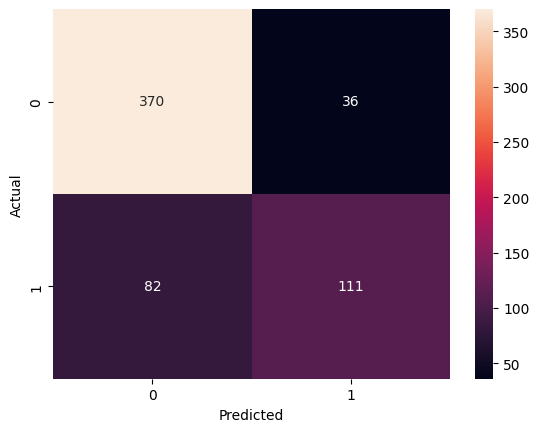

In [37]:
# Heatmap
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(data['Decision'], data['Predicted']))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       406
           1       0.76      0.58      0.65       193

    accuracy                           0.80       599
   macro avg       0.79      0.74      0.76       599
weighted avg       0.80      0.80      0.79       599



## Take Out Features to Evaluate Impact